<a href="https://colab.research.google.com/github/Benjamon22/Restaurant-Recommendation-Engine/blob/main/Model_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/MyDrive/business_with_sentiments.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
business_df = pd.read_csv(file_path)
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,BusinessParking,RestaurantsTakeOut,RestaurantsPriceRange2,RestaurantsDelivery,Parking,Parking_Category,food_sentiment,service_sentiment,ambience_sentiment,value_sentiment
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,80,...,"{'garage': False, 'street': True, 'validated':...",True,1.0,False,1,Limited Parking,0.651448,0.600862,0.606204,0.712334
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054.0,40.338183,-75.471659,4.5,13,...,"{'garage': None, 'street': None, 'validated': ...",True,NaN,NaN,1,Limited Parking,0.816149,0.822556,0.762702,0.655899
2,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015.0,36.269593,-87.058943,2.0,6,...,NaN,True,1.0,True,0,No Parking,0.502336,0.152795,0.343063,0.395531
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207.0,36.208102,-86.768170,1.5,10,...,"{'garage': False, 'street': False, 'validated'...",True,1.0,True,0,No Parking,0.445874,0.302813,0.204889,0.203204
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,33602.0,27.955269,-82.456320,4.0,10,...,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,0,No Parking,0.771255,0.680555,0.581408,0.471269


In [4]:
business_df[['food_sentiment', 'service_sentiment', 'ambience_sentiment', 'value_sentiment']].describe()

,food_sentiment,service_sentiment,ambience_sentiment,value_sentiment
count,56023.000000,56023.000000,56023.000000,56023.000000
mean,0.611697,0.577645,0.550217,0.554294
std,0.221865,0.217350,0.151574,0.178114
min,-0.702911,-0.868340,-0.288054,-0.502193
25%,0.507010,0.486882,0.475446,0.472716
50%,0.671667,0.640234,0.587486,0.605456
75%,0.772447,0.727735,0.654466,0.678050
max,0.992483,0.992483,0.976920,0.986450


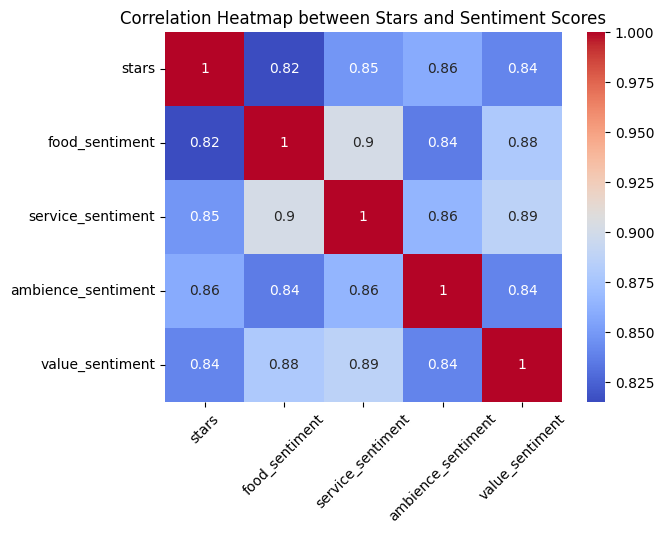

In [5]:
# Heatmap for the correlation between stars and each of the 4 sentiments
sns.heatmap(
    business_df[['stars', 'food_sentiment', 'service_sentiment', 'ambience_sentiment', 'value_sentiment']].corr(),
    annot=True, cmap='coolwarm'
)
plt.title("Correlation Heatmap between Stars and Sentiment Scores")
plt.xticks(rotation=45)
plt.show()

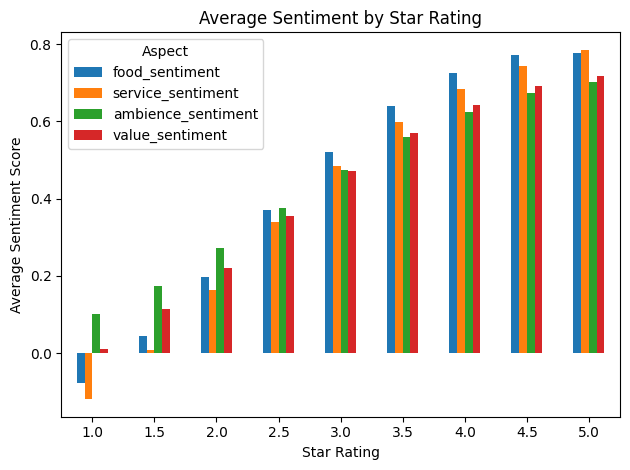

In [6]:
# Visualize the effect of sentiments on stars using histogram
avg_sent_by_star = business_df.groupby('stars')[['food_sentiment', 'service_sentiment', 'ambience_sentiment', 'value_sentiment']].mean()

# Plot the average sentiments as a bar plot (histogram-style)
avg_sent_by_star.plot(kind='bar')

plt.title("Average Sentiment by Star Rating")
plt.ylabel("Average Sentiment Score")
plt.xlabel("Star Rating")
plt.xticks(rotation=0)
plt.legend(title="Aspect")
plt.tight_layout()
plt.show()

In [7]:
top5_food = business_df.sort_values('food_sentiment', ascending=False).head(5)
print(top5_food[['name', 'food_sentiment']])

                        name  food_sentiment
16020  Perfect Pear Catering        0.992483
8500              HomeCooked        0.988040
4609               Ruby Cafe        0.986450
9961          Akoya at Pearl        0.985940
34319   Zionsville Olive Oil        0.985667


In [8]:
business_df['categories']

,categories
0,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
1,"Brewpubs, Breweries, Food"
2,"Burgers, Fast Food, Sandwiches, Food, Ice Crea..."
3,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,..."
4,"Vietnamese, Food, Restaurants, Food Trucks"
...,...
56018,"Restaurants, Sandwiches, Convenience Stores, C..."
56019,"Cafes, Juice Bars & Smoothies, Coffee & Tea, R..."
56020,"Specialty Food, Food, Coffee & Tea, Coffee Roa..."
56021,"Restaurants, Mexican"


In [9]:
# Step 1: Split all category strings into individual words
all_categories = business_df['categories'].dropna().str.split(', ')

# Step 2: Flatten the list of lists into one big list
flat_categories = [item for sublist in all_categories for item in sublist]

# Step 3: Count each unique category
category_counts = pd.Series(flat_categories).value_counts()

# Step 4: Show the top 50
print(category_counts.head(50))

Restaurants                  42691
Food                         22917
Nightlife                     9880
Bars                          9481
Sandwiches                    7445
American (Traditional)        7251
Coffee & Tea                  5892
Pizza                         5751
Fast Food                     5699
Breakfast & Brunch            5675
American (New)                5416
Burgers                       4995
Italian                       3980
Mexican                       3834
Shopping                      3608
Specialty Food                3508
Event Planning & Services     3480
Seafood                       3142
Salad                         2889
Desserts                      2761
Chicken Wings                 2680
Bakeries                      2586
Grocery                       2496
Cafes                         2373
Chinese                       2352
Ice Cream & Frozen Yogurt     2217
Caterers                      2090
Delis                         2080
Beer                

In [10]:
def compute_default_weights_pca(df, features=None):
    if features is None:
        features = ['food_sentiment', 'service_sentiment', 'ambience_sentiment', 'value_sentiment', 'stars']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features])
    pca = PCA(n_components=1)
    pca.fit(X_scaled)

    # Extract absolute loadings from the first principal component
    loadings = abs(pca.components_[0])  # shape: (n_features,)

    # Normalize to make weights sum to 1
    weights = loadings / loadings.sum()

    # Map back to feature names
    weight_dict = dict(zip(features, weights))
    return weight_dict

In [11]:
weights_dict = compute_default_weights_pca(business_df)
for k, v in weights_dict.items():
    print(f"{k:<20}: {v:.4f}")

food_sentiment      : 0.2002
service_sentiment   : 0.2034
ambience_sentiment  : 0.1986
value_sentiment     : 0.2008
stars               : 0.1969


In [12]:
from scipy.stats import pearsonr

def analyze_review_star_correlation(df):
    # Drop rows with missing values
    subset = df[['review_count', 'stars']].dropna()

    # Compute Pearson correlation
    corr, p_value = pearsonr(subset['review_count'], subset['stars'])

    print(f"Pearson correlation: {corr:.4f}")
    print(f"P-value: {p_value:.4e}")

In [13]:
analyze_review_star_correlation(business_df)

Pearson correlation: 0.1248
P-value: 3.7575e-193


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define features and target
features = ['food_sentiment', 'service_sentiment', 'ambience_sentiment', 'value_sentiment', 'review_count']
X = business_df[features]
y = business_df['stars']

# Fit linear model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
coefficients = dict(zip(features, model.coef_))
intercept = model.intercept_

# Predict and calculate R²
y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)

# Output results
print("Regression coefficients:")
for k, v in coefficients.items():
    print(f"  {k:<20}: {v:.4f}")
print(f"\nIntercept: {intercept:.4f}")
print(f"R² score (explained variance): {r_squared:.4f}")

Regression coefficients:
  food_sentiment      : 0.1621
  service_sentiment   : 0.8987
  ambience_sentiment  : 2.3294
  value_sentiment     : 1.2189
  review_count        : -0.0001

Intercept: 1.0293
R² score (explained variance): 0.7966


In [32]:
from sklearn.preprocessing import MinMaxScaler

def compute_restaurant_scores(df, weight_dict, selected_features, review_boost=0):
    """
    Computes scores using a selected subset of features, adjusting weights to sum to 1.

    Args:
        df (pd.DataFrame): Restaurant data.
        weight_dict (dict): Full weights (e.g., from PCA).
        selected_features (list): Subset of features selected by user.
        review_boost (float): Optional weight for review_count, should be within [0,1].

    Returns:
        pd.DataFrame: With new column 'final_score'.
    """
    features = selected_features.copy()
    max_review_weight = 0.1
    actual_review_weight = review_boost * max_review_weight

    # Add 'review_count' if review_boost > 0
    if actual_review_weight > 0:
        df['log_review_count'] = np.log1p(df['review_count'])  # log(1 + x)
        features.append('log_review_count')

    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df[features])

    weights = []
    for feat in features:
        if feat == 'log_review_count':
            weights.append(actual_review_weight)
        else:
            weights.append(weight_dict.get(feat, 0))

    weights = np.array(weights)
    weights = weights / weights.sum()
    scores = scaled @ weights
    df['final_score'] = 10 * scores / scores.max()

    return df

In [33]:
# e.g. Compute scores with a review boost of 0.8
scored_df = compute_restaurant_scores(business_df, weights_dict, ['food_sentiment', 'service_sentiment'], review_boost=0.8)

# Display top 5 restaurants
scored_df[['name', 'final_score']].sort_values(by='final_score', ascending=False).head()

,name,final_score
11696,Commander's Palace,10.000000
36663,Talula's Garden,9.908797
11629,Zahav,9.895638
54174,GW Fins,9.861411
42113,Bouchon,9.825010


In [27]:
scored_df[scored_df['name'].str.contains('bouchon', case=False, na=False)]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,RestaurantsPriceRange2,RestaurantsDelivery,Parking,Parking_Category,food_sentiment,service_sentiment,ambience_sentiment,value_sentiment,log_review_count,final_score
42113,tthy48ZIX_wfY8Dy0Dvg6w,Bouchon,9 W Victoria St,Santa Barbara,CA,93101.0,34.423983,-119.70586,4.5,1452,...,3.0,False,1,Limited Parking,0.872251,0.84979,0.695607,0.702467,7.281386,9.935738


In [ ]:
def calculate_distance(lat1, lon1, lat2, lon2):
    # Approximate radius of earth in km
    R = 6371.0
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c  # Returns distance in kilometers